https://scipython.com/blog/linear-least-squares-fitting-of-a-two-dimensional-data/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Generate random data

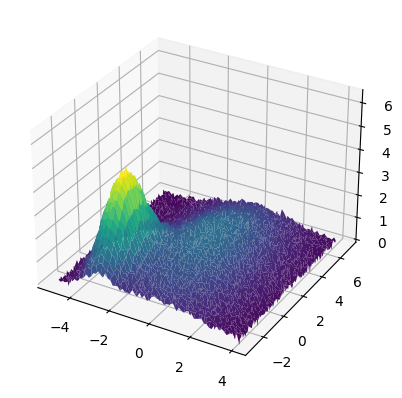

In [2]:
np.random.seed(42)

# The two-dimensional domain of the fit.
xmin, xmax, nx = -5, 4, 75
ymin, ymax, ny = -3, 7, 150
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

# A list of the Gaussian parameters: x0, y0, xalpha, yalpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         #(-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         #(3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
noise_sigma = 0.1

# The function to be fit is Z.
Z = np.zeros(X.shape)
for p in gprms:
    Z += gaussian(X, Y, *p)
Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_zlim(0,np.max(Z)+2)
plt.show()

f(x,y) = 1.2307942391991067 * x**0 * y**0 + 0.004438528995635905 * x**1 * y**0 + 0.02977519078955997 * x**2 * y**0 + -0.15541945912197402 * x**3 * y**0 + 0.014475887692716053 * x**4 * y**0 + 0.014683551064603477 * x**5 * y**0 + -0.0014790954858766537 * x**6 * y**0 + -0.0003733481775568452 * x**7 * y**0 + 2.4375012969687776e-05 * x**8 * y**0 + 0.18780220222864383 * x**0 * y**1 + 0.023204513976778553 * x**1 * y**1 + -0.08079882784265754 * x**2 * y**1 + 0.027348026369713004 * x**3 * y**1 + 0.001903745373650007 * x**4 * y**1 + -0.002758423619203294 * x**5 * y**1 + 0.00011508730995186137 * x**6 * y**1 + 7.994466437463657e-05 * x**7 * y**1 + -0.08300499489127254 * x**0 * y**2 + 0.06601703979469621 * x**1 * y**2 + -0.02251748607674691 * x**2 * y**2 + -3.8714428346496465e-05 * x**3 * y**2 + 0.0011761544743026766 * x**4 * y**2 + -9.492661985287602e-05 * x**5 * y**2 + -7.137064840001745e-06 * x**6 * y**2 + 0.004422702407788415 * x**0 * y**3 + -0.01687987242289002 * x**1 * y**3 + 0.00902465241668

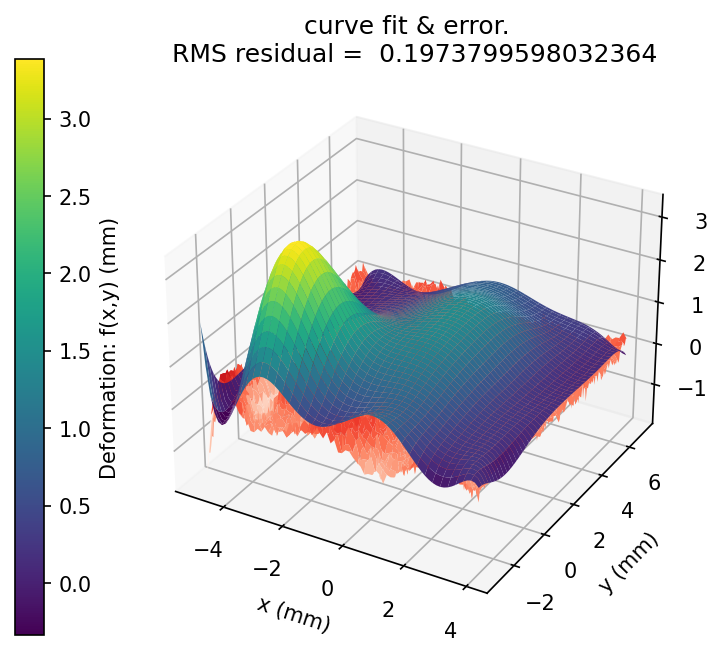

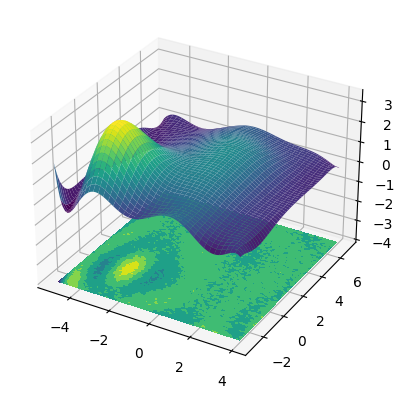

In [12]:
def get_basis(x, y, max_order=4):
    """Return the fit basis polynomials: 1, x, x^2, ..., xy, x^2y, ... etc."""
    basis = []
    for i in range(max_order+1):
        for j in range(max_order - i +1):
            basis.append(x**j * y**i)
    return basis

def get_basis_str(x, y, max_order=4):
    """Return the fit basis polynomials: 1, x, x^2, ..., xy, x^2y, ... etc."""
    basis_str = []
    for i in range(max_order+1):
        for j in range(max_order - i +1):
            basis_str.append(f'x**{j} * y**{i}')
    return basis_str

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
x, y = X.ravel(), Y.ravel()
# Maximum order of polynomial term in the basis.
max_order = 8
basis = get_basis(x, y, max_order)
# Linear, least-squares fit.
A = np.vstack(basis).T
b = Z.ravel()

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
c, r, rank, s = np.linalg.lstsq(A, b, rcond=None)
# c is our basis coefficients

basis_str = get_basis_str(x, y, max_order)


fstr = ' + '.join([f'{c[i]} * {basis_str[i]}' for i in range(len(c))])
print("f(x,y) =", fstr)
print('Fitted parameters:')
print(c)

# Calculate the fitted surface from the coefficients, c.
fit = np.sum(c[:, None, None] * np.array(get_basis(X, Y, max_order))
                .reshape(len(basis), *X.shape), axis=0)

rms = np.sqrt(np.mean((Z - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
plt.title(f'curve fit & error. \n RMS residual =  {rms}')
pcm = ax.plot_surface(X, Y, fit, cmap='viridis')
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
# Adding the colorbar
cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
fig.colorbar(pcm, cax = cbaxes)
plt.ylabel("Deformation: f(x,y) (mm)")
pcm = ax.plot_surface(X, Y, Z-fit, cmap='Reds')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, fit, cmap='viridis')
cset = ax.contourf(X, Y, Z-fit, zdir='z', offset=-4, cmap='viridis')
ax.set_zlim(-4,np.max(fit))
plt.show()